In [1]:
import sys
%load_ext autoreload
sys.path.append('..')

In [2]:
%autoreload 2
from FEMOL import RectangleQuadMesh, FEM_Problem, TOPOPT_Problem
from FEMOL_utils import *

# Cantilever Square Topology Optimization

## Mesh

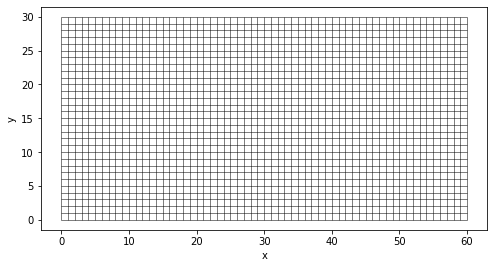

In [10]:
nelx = 60 # elements in the x direction
nely = 30 # elements in the y direction

# Creating the mesh
Lx = nelx
Ly = nely

plt.figure(figsize=(8,8))
mesh = RectangleQuadMesh(Lx, Ly, nelx, nely)
mesh.plot()

### Cantilever Square Topology Optimization Problem

Defining the FEM problem

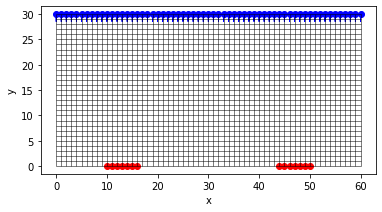

In [22]:
# distributing the material to the initial volume fraction
volfrac = 0.5
penal = 3
X = np.ones(nelx*nely)*volfrac  

# Material proprieties
E = 1
nu = 0.3
t = 1 # thickness

# Creating the FEM Problem
Problem = FEM_Problem(mesh) # initialize the problem
Problem.isotropic_plane_stress_tensor(E, nu, t) # Define the stiffness tensor
Problem.get_plane_stress_Ke() # Get the element stiffness matrix (constant for every element)

# Boundary condition domains :

# Fixed nodes on the left side
x = [[3*Lx/18, 5*Lx/18]]
y = [0]
fixed_domain_1 = create_domain(x, y)

# Fixed nodes on the left side
x = [[13*Lx/18, 15*Lx/18]]
y = [0]
fixed_domain_2 = create_domain(x, y)

# Domain where the down force is applied
x = [[0, Lx]]
y = [Ly]
force_domain = create_domain(x, y)

# Defining the force
force = [[0, -1]] #  Force = [Fx, Fy]


Problem.assemble_1_material_topopt(X, penal)
Problem.add_fixed_domain(fixed_domain_1)
Problem.add_fixed_domain(fixed_domain_2)
Problem.add_forces(force, [force_domain])
Problem.fix_boundary()
Problem.plot()

## Solving the topology optimisation problem

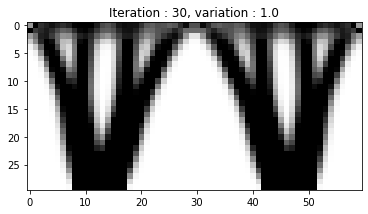

In [23]:
TOPOPT = TOPOPT_Problem(Problem)
Result = TOPOPT.solve()

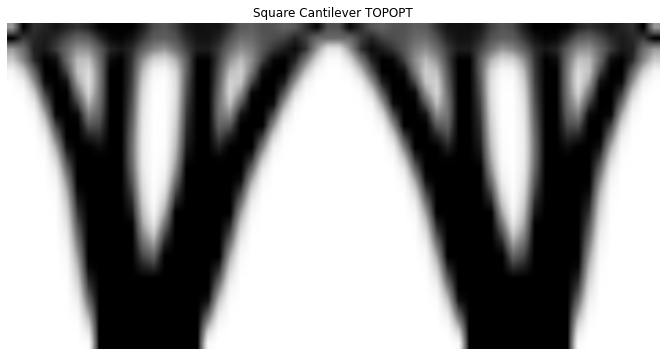

In [25]:
plt.figure(figsize=(12,6))
Result.plot()
plt.title('Square Cantilever TOPOPT')
plt.show()

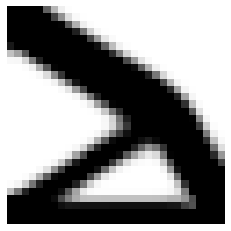

In [13]:
Result.animate('Square_Cantilever')